In [1]:
from scipy import stats
from scipy.stats import pearsonr, kendalltau

srcc = stats.spearmanr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc0 = pearsonr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc1 = kendalltau( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])

srcc[0],srcc0[0],srcc1[0]

(-0.3369615411989142, -0.31079259594045033, -0.23766989273624328)

In [2]:
import torch
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())


NVIDIA GeForce GTX 1050
True


In [3]:
%cd ..


d:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA


In [4]:
from test_DistillationIQA_single import DistillationIQASolver


obj_org = DistillationIQASolver(net_mode="org",student_address='./model_zoo/NAR_student_cross_dataset.pth')

normal mode...
>>>>>  ./model_zoo/NAR_student_cross_dataset.pth


In [5]:
obj_stackV1 = DistillationIQASolver(net_mode="stackingV1",student_address='./model_zoo/stacking_ep98_saved_student_model.pth')

stacking modeV1...
>>>>>  ./model_zoo/stacking_ep98_saved_student_model.pth


In [4]:
from test_DistillationIQA_single import DistillationIQASolver

obj_stackV2 = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/stackingV2-ep70.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/stackingV2-ep70.pth


In [7]:
obj_4loss = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/4loss_ep+26_5.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/4loss_ep+26_5.pth


# dst:

In [9]:
import random , glob

def get_random_HR_images():
    all_images = glob.glob('D:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA\dataset\DIV2K_ref/val_HR/*')
    return random.sample(all_images, 1)[0]


get_random_HR_images()

'D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0853.png'

all imgs


In [5]:
def calculate_std(data):
    if len(data) == 0:
        return 0
    mean = sum(data) / len(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std = variance ** 0.5
    return std



calculate_std([11,11,11,11,11,11,11,10])

0.33071891388307384

In [6]:
import glob

all_tid_images = glob.glob("dataset/TID2013/distorted_images/*.bmp")
len(all_tid_images),all_tid_images

(3000,
 ['dataset/TID2013/distorted_images\\I01_01_1.bmp',
  'dataset/TID2013/distorted_images\\i01_01_2.bmp',
  'dataset/TID2013/distorted_images\\i01_01_3.bmp',
  'dataset/TID2013/distorted_images\\i01_01_4.bmp',
  'dataset/TID2013/distorted_images\\i01_01_5.bmp',
  'dataset/TID2013/distorted_images\\i01_02_1.bmp',
  'dataset/TID2013/distorted_images\\i01_02_2.bmp',
  'dataset/TID2013/distorted_images\\i01_02_3.bmp',
  'dataset/TID2013/distorted_images\\i01_02_4.bmp',
  'dataset/TID2013/distorted_images\\i01_02_5.bmp',
  'dataset/TID2013/distorted_images\\i01_03_1.bmp',
  'dataset/TID2013/distorted_images\\i01_03_2.bmp',
  'dataset/TID2013/distorted_images\\i01_03_3.bmp',
  'dataset/TID2013/distorted_images\\i01_03_4.bmp',
  'dataset/TID2013/distorted_images\\i01_03_5.bmp',
  'dataset/TID2013/distorted_images\\i01_04_1.bmp',
  'dataset/TID2013/distorted_images\\i01_04_2.bmp',
  'dataset/TID2013/distorted_images\\i01_04_3.bmp',
  'dataset/TID2013/distorted_images\\i01_04_4.bmp',
  'da

In [10]:
all_tid_images[5] , all_tid_images[456]

('dataset/TID2013/distorted_images\\i01_02_1.bmp',
 'dataset/TID2013/distorted_images\\i04_20_2.bmp')

In [35]:
li = []

for i in range(10):
    li.append(obj_stackV2.cvr_on_single_image(all_tid_images[764] ,get_random_HR_images()))

calculate_std(li)


0.09795001094733063

In [38]:
import random
import string
from tqdm import tqdm


def generate_random_filename(num,extension=".txt"):
    letters = string.ascii_lowercase
    random_name = "".join(random.choice(letters) for i in range(8))
    return str(num)+"_"+random_name + extension


for i in range(2):
    random_filename = generate_random_filename(i)
    with open(random_filename, 'w') as file:
        for im in tqdm(all_tid_images):
            sc = obj_stackV2.cvr_on_single_image(im ,get_random_HR_images())
            file.write(f"{sc:.3f} {im}\n")
            



 19%|█▉        | 579/3000 [07:15<45:50,  1.14s/it]  

In [7]:
import os

# Directory containing the txt files
directory = "S17_variance_test/tid13_50times"

# List to store the names of txt files
txt_files = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        txt_files.append(filename)

# Print the list of txt files
print(len(txt_files))
# txt_files


51


In [8]:
def calculate_mean(lst):
    return sum(lst) / len(lst)

In [9]:
# Directory containing the txt files
directory = "S17_variance_test/tid13_50times"
from tqdm import tqdm
# List to store the first line values

all_stds = []
all_means = []
# Iterate over the txt files
for i in tqdm(range(3000)):
    first_line_values = []

    for filename in txt_files:
        with open(os.path.join(directory, filename), 'r') as file:
            for j in range(i):
                file.readline()
            first_line = file.readline().strip()
            if first_line:
                value = first_line.split()[0]
                first_line_values.append(float(value))

    all_stds.append(calculate_std(first_line_values))
    all_means.append(calculate_mean(first_line_values))
# Print the list of first line values







100%|██████████| 3000/3000 [03:38<00:00, 13.72it/s]


In [10]:
# Function to read a txt file and return its contents as a list
def read_txt_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [line.strip() for line in lines]

# Example usage
file_path = "dataset/TID2013/mos_std.txt"
file_contents = read_txt_to_list(file_path)
# print(file_contents)
# Convert the list of strings to a list of floats
stdd = [float(value) for value in file_contents]
print(len(stdd))



# Example usage
file_path = "dataset/TID2013/mos.txt"
file_contents = read_txt_to_list(file_path)
# print(file_contents)
# Convert the list of strings to a list of floats
moss = [float(value) for value in file_contents]
print(len(moss))



3000
3000


In [16]:
dist_type = []
refs = []
for im in all_tid_images:
    dist_type.append(int(im.split(".")[0][-4:-2]))
    refs.append(int(im.split(".")[0][-7:-5]))

In [ ]:
ValueError: 'hls' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


C:\Users\Farhad\AppData\Local\Temp\ipykernel_12696\3488231307.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('gist_rainbow', 25)


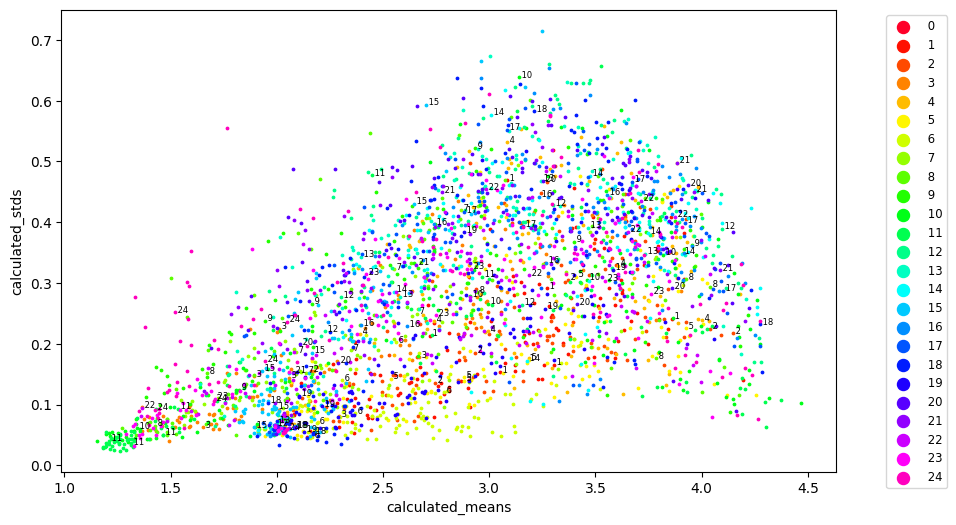

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `class_ids` is a list of class IDs corresponding to each data point in `all_means` and `all_stds`
# Example: class_ids = [0, 1, 2, ..., 24, 0, 1, 2, ..., 24, ...]

# Generate random class IDs for demonstration purposes
# np.random.seed(0)
class_ids = dist_type

# Define a color map for the 25 classes
colors = plt.cm.get_cmap('gist_rainbow', 25)



# Plot scatter plot with colors based on class IDs and print class name in 10% of data
plt.figure(figsize=(10, 6))
for class_id in range(25):
    indices = [i for i, cid in enumerate(class_ids) if cid == class_id]
    plt.scatter(np.array(all_means)[indices], np.array(all_stds)[indices], s=3, color=colors(class_id), label=f' {class_id}')
    
    # Print class name in 10% of data points
    if len(indices) > 0:
        sample_indices = np.random.choice(indices, size=max(1, len(indices) //20), replace=False)
        for idx in sample_indices:
            plt.text(np.array(all_means)[idx], np.array(all_stds)[idx], f' {class_id}', fontsize=6)

plt.xlabel('calculated_means')
plt.ylabel('calculated_stds')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small', markerscale=5)
plt.show()





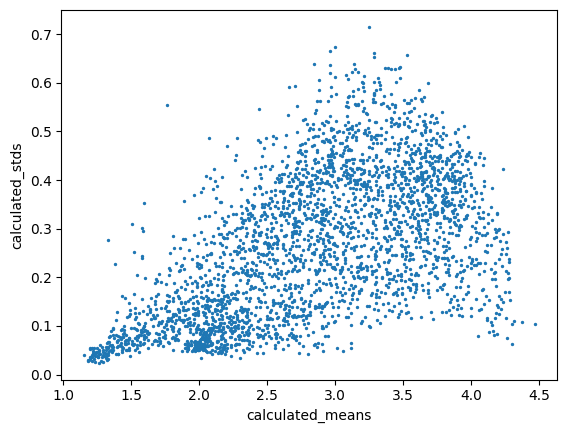

0.5661145594388299


In [17]:
# Normalize the lists
# moss_normalized = [(x - min(moss)) / (max(moss) - min(moss)) for x in moss]
# stdd_normalized = [(x - min(stdd)) / (max(stdd) - min(stdd)) for x in stdd]

# Plot scatter plot
import matplotlib.pyplot as plt

plt.scatter(all_means, all_stds, s=2)
plt.xlabel('calculated_means')
plt.ylabel('calculated_stds')
plt.show()

# Compute correlation
correlation, _ = pearsonr(all_means, all_stds)
print(correlation)


In [6]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming `all_stds` is the list of standard deviations calculated earlier
# and `file_contents` is the list of MOS standard deviations from the txt file
# Normalize the lists
file_contents1 = [(x - min(file_contents)) / (max(file_contents) - min(file_contents)) for x in file_contents]
all_stds1 = [(x - min(all_stds)) / (max(all_stds) - min(all_stds)) for x in all_stds]

# Plot scatter plot
plt.scatter(file_contents1, all_stds1, s= 2)
plt.xlabel('MOS')
plt.ylabel('Calculated Standard Deviations')
plt.title('Scatter Plot of MOS vs Calculated Standard Deviations')
plt.show()

# Compute correlation
correlation, _ = pearsonr(file_contents1, all_stds1)
print(f'Correlation between MOS and Calculated Standard Deviations: {correlation}')
# Plot scatter plot with small points
# plt.scatter(file_contents1, all_stds1, s=10)  # s parameter sets the size of the points
# plt.xlabel('MOS Standard Deviations')
# plt.ylabel('Calculated Standard Deviations')
# plt.title('Scatter Plot of MOS vs Calculated Standard Deviations')
# plt.show()



TypeError: unsupported operand type(s) for -: 'str' and 'str'

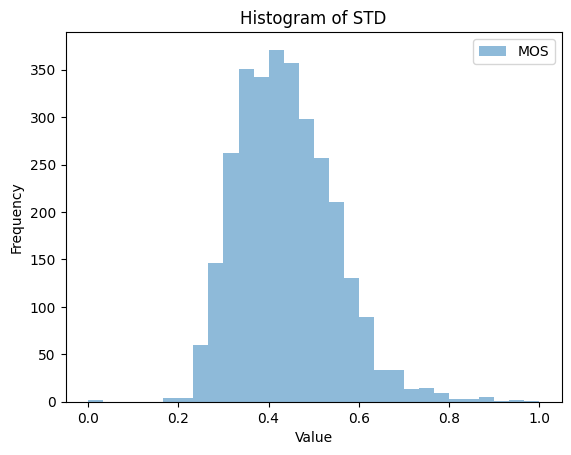

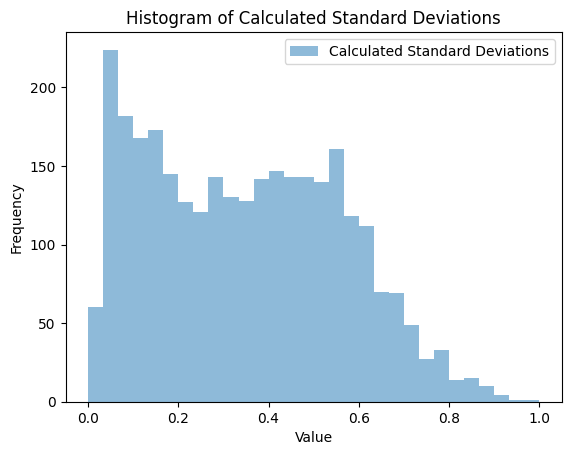

In [16]:
# Plot histograms of the two lists

# Plot histogram for file_contents1
plt.hist(file_contents1, bins=30, alpha=0.5, label='MOS')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of STD')
plt.legend()
plt.show()

# Plot histogram for all_stds1
plt.hist(all_stds1, bins=30, alpha=0.5, label='Calculated Standard Deviations')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Calculated Standard Deviations')
plt.legend()
plt.show()
